Data Collection & Processing

In [1]:
import pandas as pd
import h5py
import hdf5plugin
from datetime import datetime

# Path to UK-DALE HDF5 file
file_path = '/users/kjain/Downloads/ukdale.h5'

# Define a manual mapping of meters to appliances
meter_mapping = {
    'meter1': 'Main Power',
    'meter2': 'stereo_speakers_bedroom',
    'meter3': 'i7_desktop',
    'meter4': 'hairdryer',
    'meter5': 'primary_tv',
    'meter6': '24_inch_lcd_bedroom',
    'meter7': 'treadmill',
    'meter8': 'network_attached_storage',
    'meter9': 'core2_server',
    'meter10': '24_inch_lcd',
    'meter11': 'PS4',
    'meter12': 'steam_iron',
    'meter13': 'nespresso_pixie',
    'meter14': 'atom_pc',
    'meter15': 'toaster',
    'meter16': 'home_theatre_amp',
    'meter17': 'sky_hd_box',
    'meter18': 'kettle',
    'meter19': 'fridge_freezer',
    'meter20': 'oven',
    'meter21': 'electric_hob',
    'meter22': 'dishwasher',
    'meter23': 'microwave',
    'meter24': 'washer_dryer',
    'meter25': 'vacuum_cleaner'
}

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    print("Keys:", list(hdf.keys())) # Check available buildings

    # Navigate to House 1's electricity data
    house_path = 'building5/elec'
    house_data = hdf[house_path]

    # List to store DataFrames for each meter
    meter_dfs = []

    # Process meters (select relevant meters based on mapping)
    for meter_id in meter_mapping.keys():
        meter_path = f"{house_path}/{meter_id}"

        if "table" in house_data[meter_id]:
            print(f"Processing {meter_id} ({meter_mapping[meter_id]})...")
            table_data = house_data[meter_id]['table']
            timestamps = []
            power_values = []
            for entry in table_data[:500000]: # Read only 500,000 entries at a time
                timestamp, power = entry
                timestamps.append(datetime.utcfromtimestamp(timestamp / 1e9)) # Convert nanoseconds
                power_values.append(power[0]) # Extract first power value

            # Create DataFrame
            df_meter = pd.DataFrame({'timestamp': timestamps, meter_mapping[meter_id]: power_values})

            # Append to list (we will merge later)
            meter_dfs.append(df_meter)

    # Merge all meter DataFrames on timestamp
    df = meter_dfs[0]
    for meter_df in meter_dfs[1:]:
        df = df.merge(meter_df, on='timestamp', how='outer') # Outer join to include all timestamps

    # Convert timestamp to DateTimeIndex
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Filter for January 2013
    df_month = df.loc['2014-06-29':'2014-07-29']

    # Save to CSV
    df_month.to_csv('house5_all_appliances.csv')

print("Data saved to house5_all_appliances.csv")


Keys: ['building1', 'building2', 'building3', 'building4', 'building5']
Processing meter1 (Main Power)...
Processing meter2 (stereo_speakers_bedroom)...
Processing meter3 (i7_desktop)...
Processing meter4 (hairdryer)...
Processing meter5 (primary_tv)...
Processing meter6 (24_inch_lcd_bedroom)...
Processing meter7 (treadmill)...
Processing meter8 (network_attached_storage)...
Processing meter9 (core2_server)...
Processing meter10 (24_inch_lcd)...
Processing meter11 (PS4)...
Processing meter12 (steam_iron)...
Processing meter13 (nespresso_pixie)...
Processing meter14 (atom_pc)...
Processing meter15 (toaster)...
Processing meter16 (home_theatre_amp)...
Processing meter17 (sky_hd_box)...
Processing meter18 (kettle)...
Processing meter19 (fridge_freezer)...
Processing meter20 (oven)...
Processing meter21 (electric_hob)...
Processing meter22 (dishwasher)...
Processing meter23 (microwave)...
Processing meter24 (washer_dryer)...
Processing meter25 (vacuum_cleaner)...
Data saved to house5_all_a

In [3]:
import pandas as pd
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'house5_all_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

df.head()

,Main Power,stereo_speakers_bedroom,i7_desktop,hairdryer,primary_tv,24_inch_lcd_bedroom,treadmill,network_attached_storage,core2_server,24_inch_lcd,...,home_theatre_amp,sky_hd_box,kettle,fridge_freezer,oven,electric_hob,dishwasher,microwave,washer_dryer,vacuum_cleaner
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-06-29 16:23:48,768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-29 16:23:50,NaN,1.0,114.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,108.0,0.0,0.0,NaN,NaN,NaN,NaN
2014-06-29 16:23:51,NaN,NaN,NaN,0.0,NaN,NaN,NaN,18.0,80.0,NaN,...,49.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-29 16:23:52,NaN,NaN,NaN,NaN,69.0,NaN,0.0,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-29 16:23:54,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Main Power,stereo_speakers_bedroom,i7_desktop,hairdryer,primary_tv,24_inch_lcd_bedroom,treadmill,network_attached_storage,core2_server,24_inch_lcd,...,home_theatre_amp,sky_hd_box,kettle,fridge_freezer,oven,electric_hob,dishwasher,microwave,washer_dryer,vacuum_cleaner
count,407235.000000,428778.000000,428301.000000,428838.000000,426790.00000,427650.000000,427381.000000,428850.000000,428657.000000,428985.000000,...,428400.000000,423909.000000,429006.000000,426941.000000,426942.000000,426893.000000,422852.000000,422852.000000,422852.000000,72513.000000
mean,723.296838,1.002647,116.204578,1.509216,5.46671,4.920844,3.311989,18.308952,83.100913,7.842500,...,29.069977,15.585253,11.440411,40.647415,26.353601,7.075684,16.492872,36.068624,43.343697,5.779295
std,511.017357,0.062146,28.540293,34.019114,18.29053,20.228564,39.375704,0.700359,9.632927,12.314132,...,9.323902,3.151244,164.872624,53.977698,231.089652,122.890014,157.752829,34.175097,180.091068,104.290680
min,415.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,76.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,544.000000,1.000000,114.000000,0.000000,0.00000,0.000000,0.000000,18.000000,79.000000,0.000000,...,24.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000
50%,591.000000,1.000000,118.000000,0.000000,0.00000,0.000000,0.000000,18.000000,80.000000,0.000000,...,25.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,50.000000,15.000000,0.000000
75%,667.000000,1.000000,124.000000,1.000000,0.00000,0.000000,0.000000,19.000000,83.000000,25.000000,...,26.000000,18.000000,2.000000,108.000000,0.000000,0.000000,0.000000,50.000000,16.000000,0.000000
max,9550.000000,5.000000,343.000000,1126.000000,1056.00000,198.000000,3289.000000,41.000000,297.000000,332.000000,...,153.000000,1042.000000,3959.000000,1324.000000,3047.000000,3998.000000,1715.000000,2098.000000,2502.000000,2670.000000


Time-Series Energy Usage Pattern

/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/3425970444.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').mean()


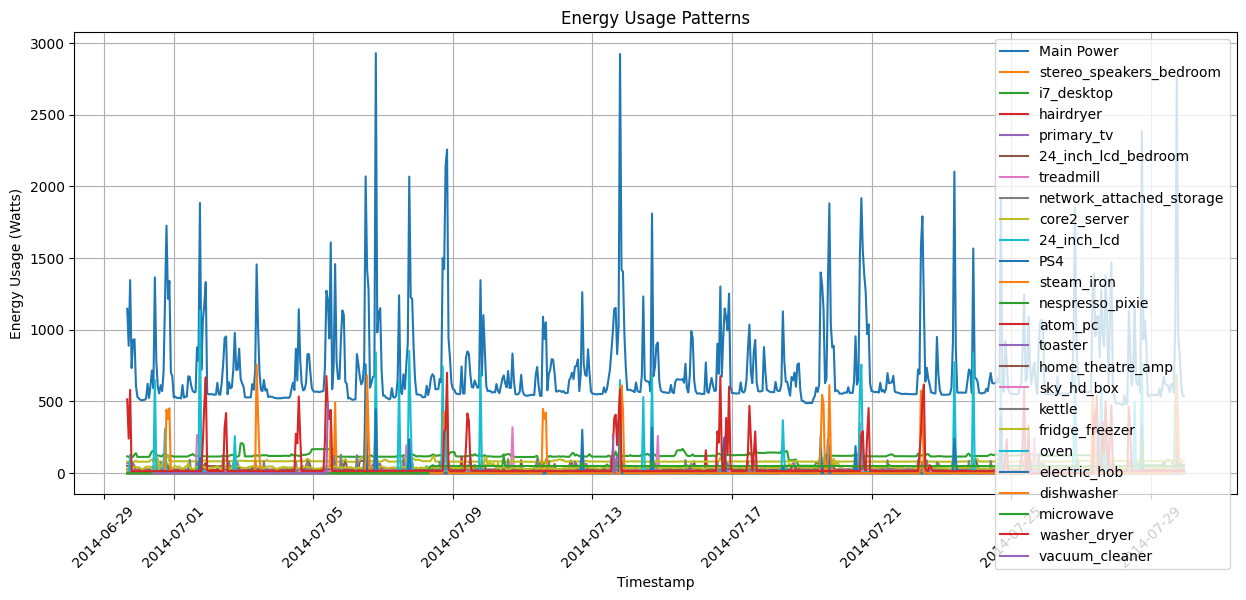

In [5]:
import pandas as pd
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'house5_all_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly mean to reduce noise
df_resampled = df.resample('1H').mean()

# Plot Time Series Data
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage Patterns')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


Appliance-Level Energy Consumption

/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/766562129.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Handle missing values minimally


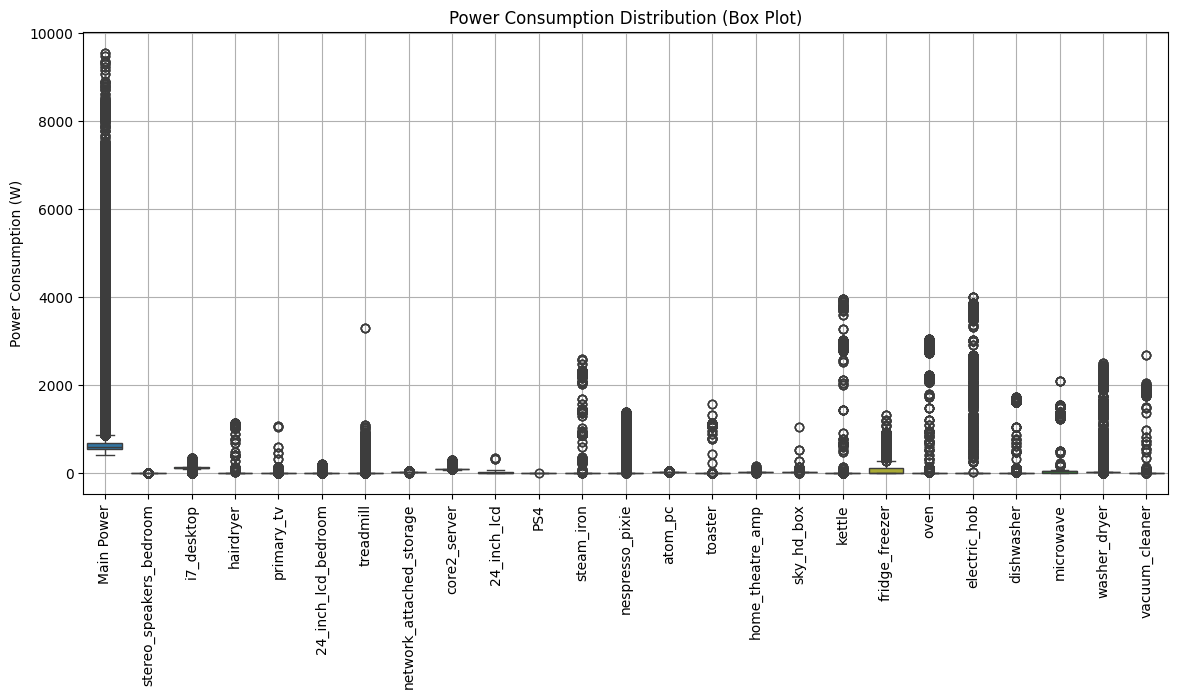

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest


# Load dataset (Ensure CSV format is maintained)
df = pd.read_csv('house5_all_appliances.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df.fillna(method='ffill', inplace=True)  # Handle missing values minimally


# Define colors for better visualization
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']


# Box Plot (Power Consumption Distribution) ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette='tab10', showfliers=True)
plt.xticks(rotation=90)
plt.ylabel('Power Consumption (W)')
plt.title('Power Consumption Distribution (Box Plot)')
plt.grid()
plt.show()




Anomaly Detection Visualization

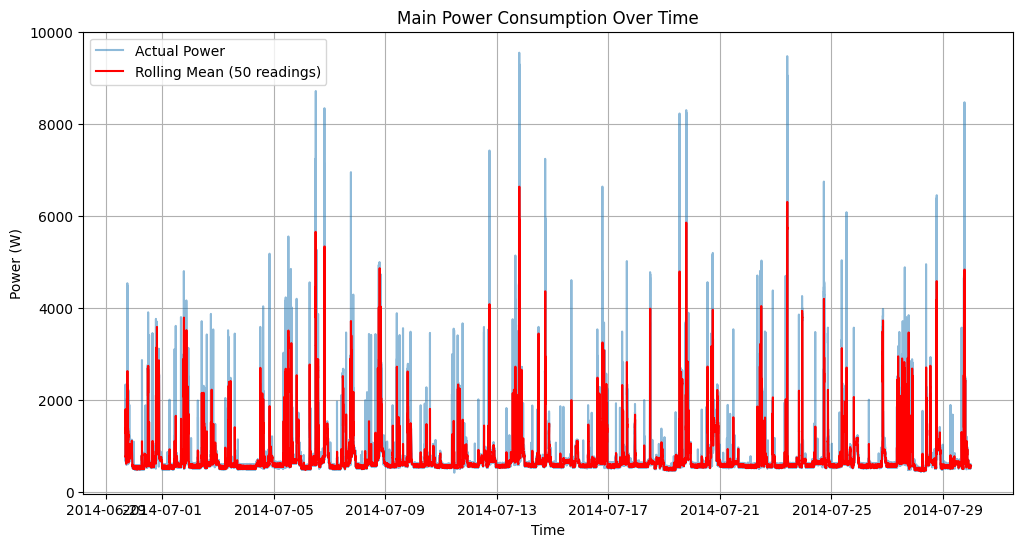

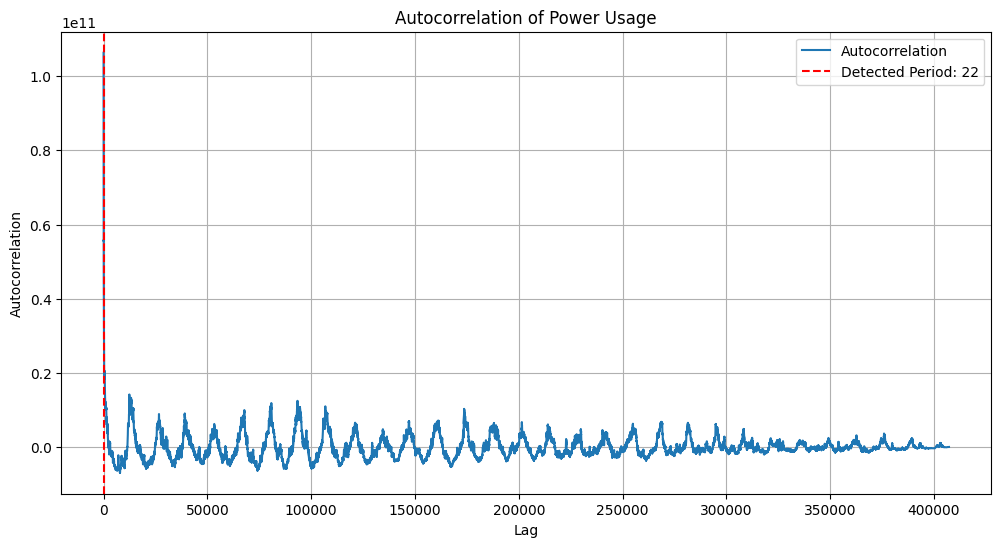

DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

# Load the CSV file
df = pd.read_csv('house5_all_appliances.csv', parse_dates=['timestamp'], index_col='timestamp')

# Drop NaN values from 'Main Power'
df = df[['Main Power']].dropna()

# Extract hour and day for heatmap analysis
df['hour'] = df.index.hour
df['day'] = pd.to_datetime(df.index.date)  # Convert day to datetime format

# Compute Rolling Mean for trend detection
df['Rolling Mean'] = df['Main Power'].rolling(window=50, min_periods=1).mean()

# Compute Autocorrelation for periodicity detection
if len(df) > 1:
    autocorr = np.correlate(df['Main Power'] - np.mean(df['Main Power']), df['Main Power'] - np.mean(df['Main Power']), mode='full')
    autocorr = autocorr[len(autocorr) // 2:]  # Keep positive lags
    peaks, _ = find_peaks(autocorr, height=0)
    dataset_period = peaks[0] if len(peaks) > 0 else None
else:
    autocorr = []
    dataset_period = None

# Time-Series Plot with Rolling Mean
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Main Power'], label="Actual Power", alpha=0.5)
plt.plot(df.index, df['Rolling Mean'], label="Rolling Mean (50 readings)", color='red')
plt.title("Main Power Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.legend()
plt.grid(True)
plt.show()

# Autocorrelation Analysis
plt.figure(figsize=(12, 6))
if len(autocorr) > 0:
    plt.plot(autocorr, label="Autocorrelation")
    if dataset_period:
        plt.axvline(x=dataset_period, color='r', linestyle='--', label=f"Detected Period: {dataset_period}")
    plt.title("Autocorrelation of Power Usage")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.legend()
    plt.grid(True)
else:
    plt.text(0.5, 0.5, "Not enough data for Autocorrelation", horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.title("Autocorrelation of Power Usage")
    plt.axis("off")
plt.show()

#  Anomaly Detection Overlay ---
model = IsolationForest(contamination=0.2, random_state=42)
df['anomaly'] = model.fit_predict(df.fillna(0))

plt.figure(figsize=(14, 6))
for idx, column in enumerate(df.columns[:-1]):
    plt.plot(df.index, df[column], label=column, color=colors[idx % len(colors)])

# Highlight anomalies
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['Main Power'], color='red', label='Anomaly', marker='x', s=80)

plt.xlabel('Time')
plt.ylabel('Power Consumption (W)')
plt.title('Time-Series with Anomaly Detection')
plt.legend(ncol=3, fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()



/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/3781488377.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Handle missing values minimally


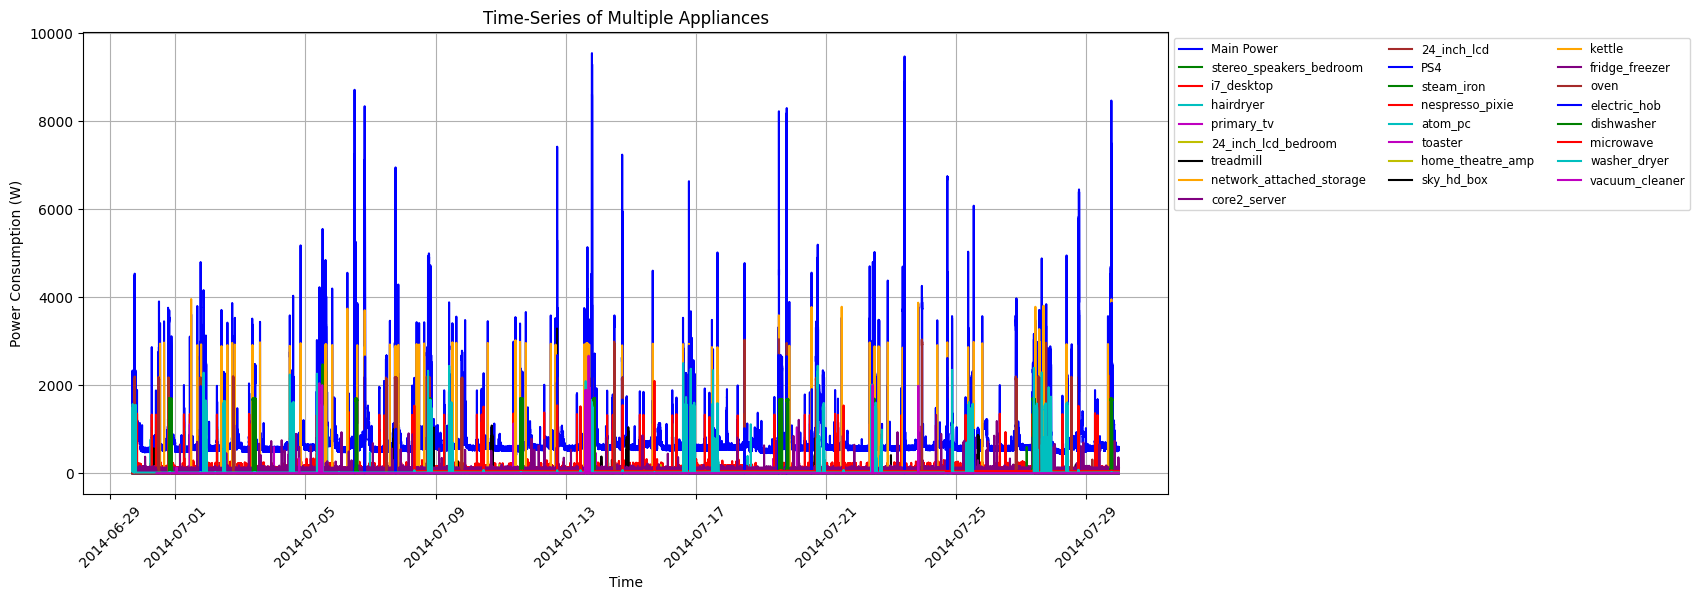

<Figure size 1400x600 with 0 Axes>

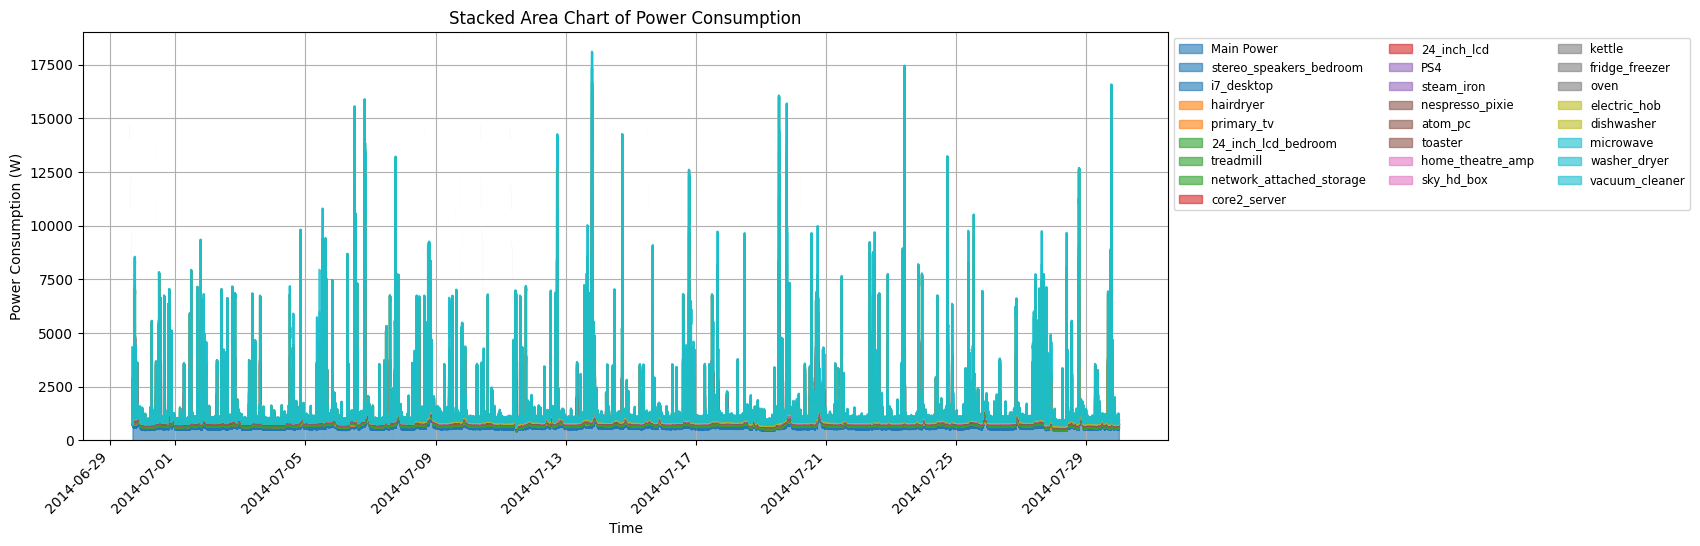

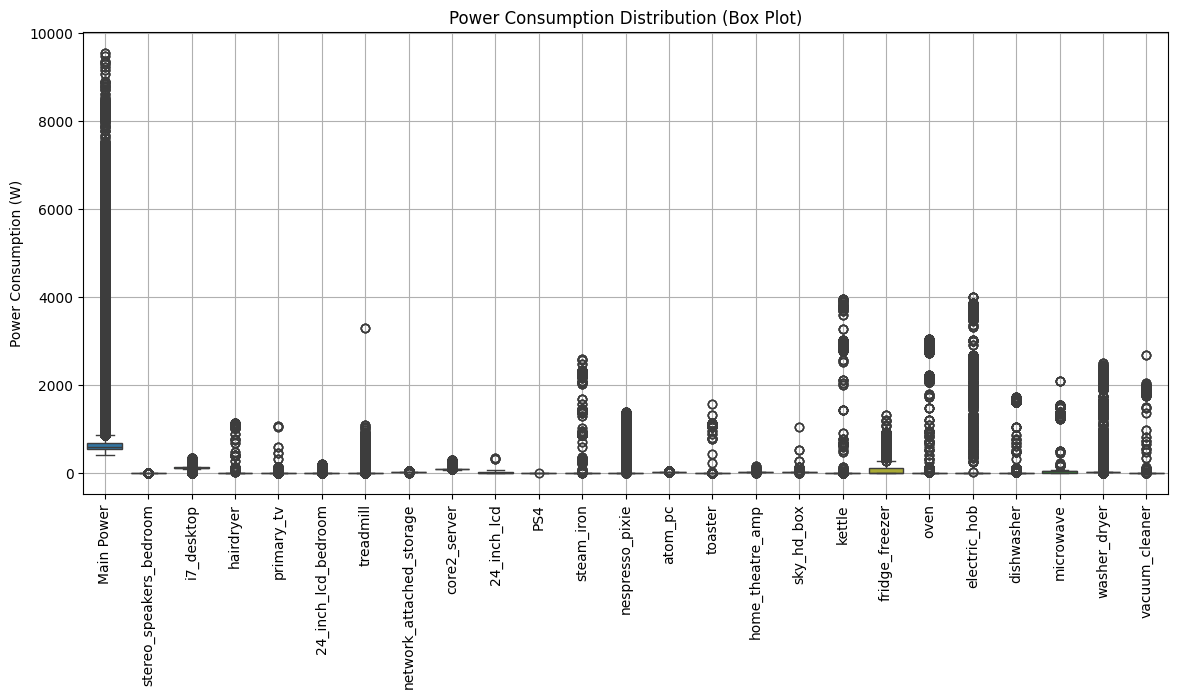

/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/3781488377.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()  # Aggregate data to hourly resolution


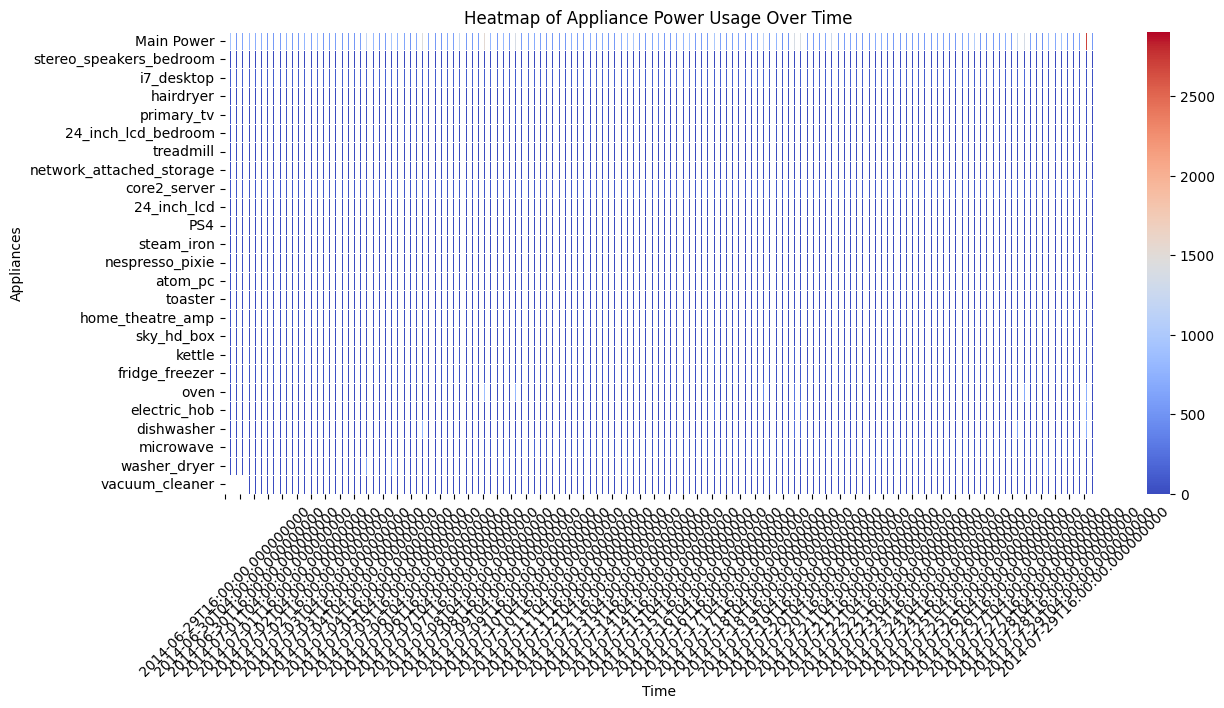

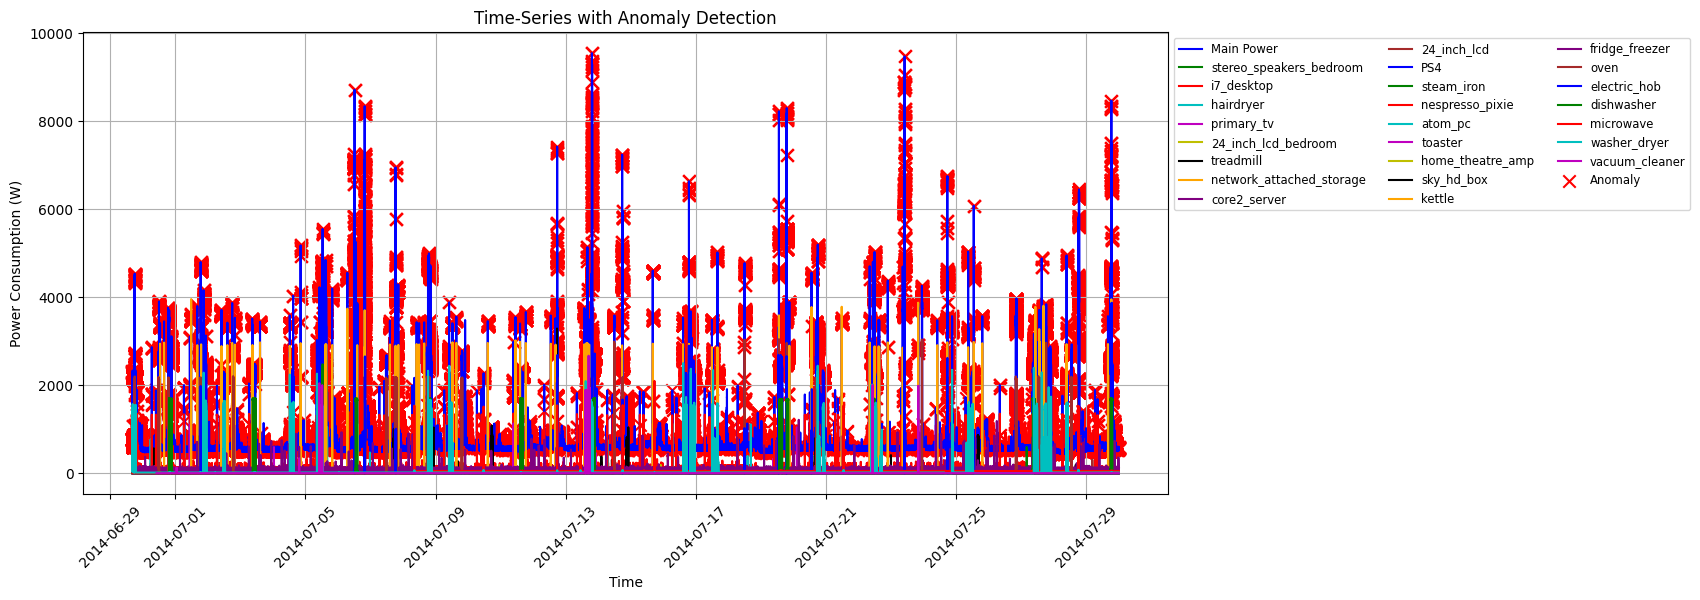

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load dataset (Ensure CSV format is maintained)
df = pd.read_csv('/Users/kjain/Project/house5_all_appliances.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df.fillna(method='ffill', inplace=True)  # Handle missing values minimally

# Define colors for better visualization
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# --- 1. Multi-Line Time-Series Plot (Comprehensive) ---
plt.figure(figsize=(14, 6))
for idx, column in enumerate(df.columns):
    plt.plot(df.index, df[column], label=column, color=colors[idx % len(colors)])

plt.xlabel('Time')
plt.ylabel('Power Consumption (W)')
plt.title('Time-Series of Multiple Appliances')
plt.legend(ncol=3, fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- 2. Stacked Area Chart (Total Power Usage Breakdown) ---
plt.figure(figsize=(14, 6))
df.plot(kind='area', stacked=True, colormap='tab10', alpha=0.6, figsize=(14, 6))
plt.xlabel('Time')
plt.ylabel('Power Consumption (W)')
plt.title('Stacked Area Chart of Power Consumption')
plt.legend(ncol=3, fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- 3. Box Plot (Power Consumption Distribution) ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette='tab10', showfliers=True)
plt.xticks(rotation=90)
plt.ylabel('Power Consumption (W)')
plt.title('Power Consumption Distribution (Box Plot)')
plt.grid()
plt.show()

# --- 4. Heatmap (Time vs. Appliance Usage) ---
df_hourly = df.resample('H').mean()  # Aggregate data to hourly resolution
plt.figure(figsize=(14, 6))
sns.heatmap(df_hourly.T, cmap='coolwarm', linewidths=0.5, cbar=True)
plt.xlabel('Time')
plt.ylabel('Appliances')
plt.title('Heatmap of Appliance Power Usage Over Time')
plt.xticks(rotation=45)
plt.show()

# --- 5. Anomaly Detection Overlay ---
model = IsolationForest(contamination=0.2, random_state=42)
df['anomaly'] = model.fit_predict(df.fillna(0))

plt.figure(figsize=(14, 6))
for idx, column in enumerate(df.columns[:-1]):
    plt.plot(df.index, df[column], label=column, color=colors[idx % len(colors)])

# Highlight anomalies
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['Main Power'], color='red', label='Anomaly', marker='x', s=80)

plt.xlabel('Time')
plt.ylabel('Power Consumption (W)')
plt.title('Time-Series with Anomaly Detection')
plt.legend(ncol=3, fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()


/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/385056522.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').mean()


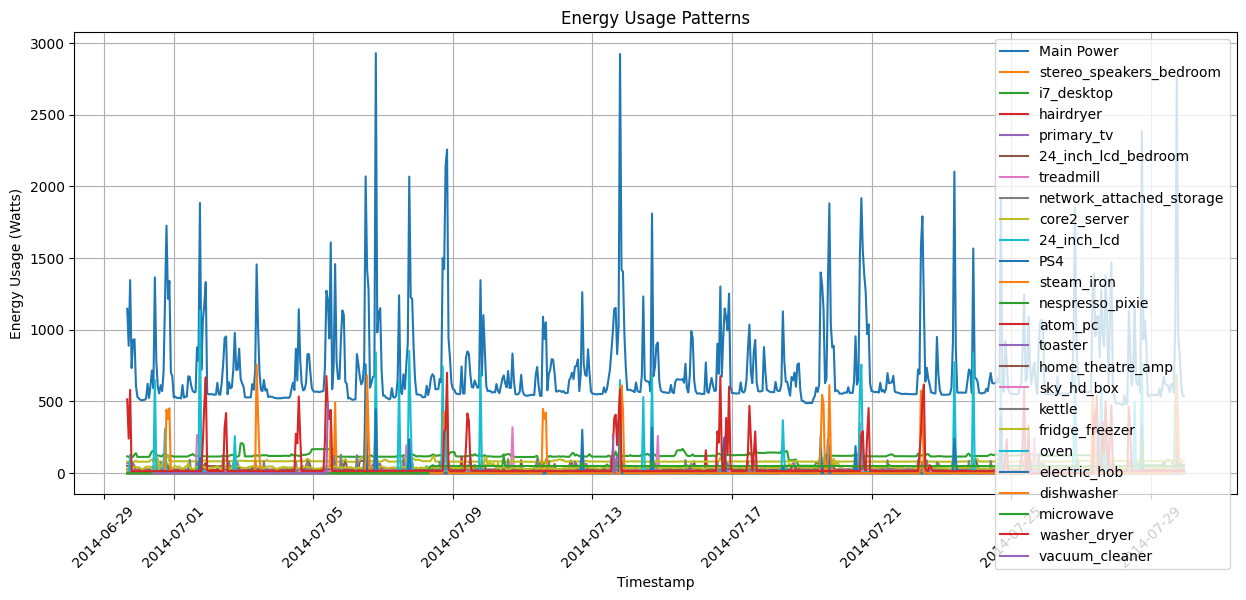

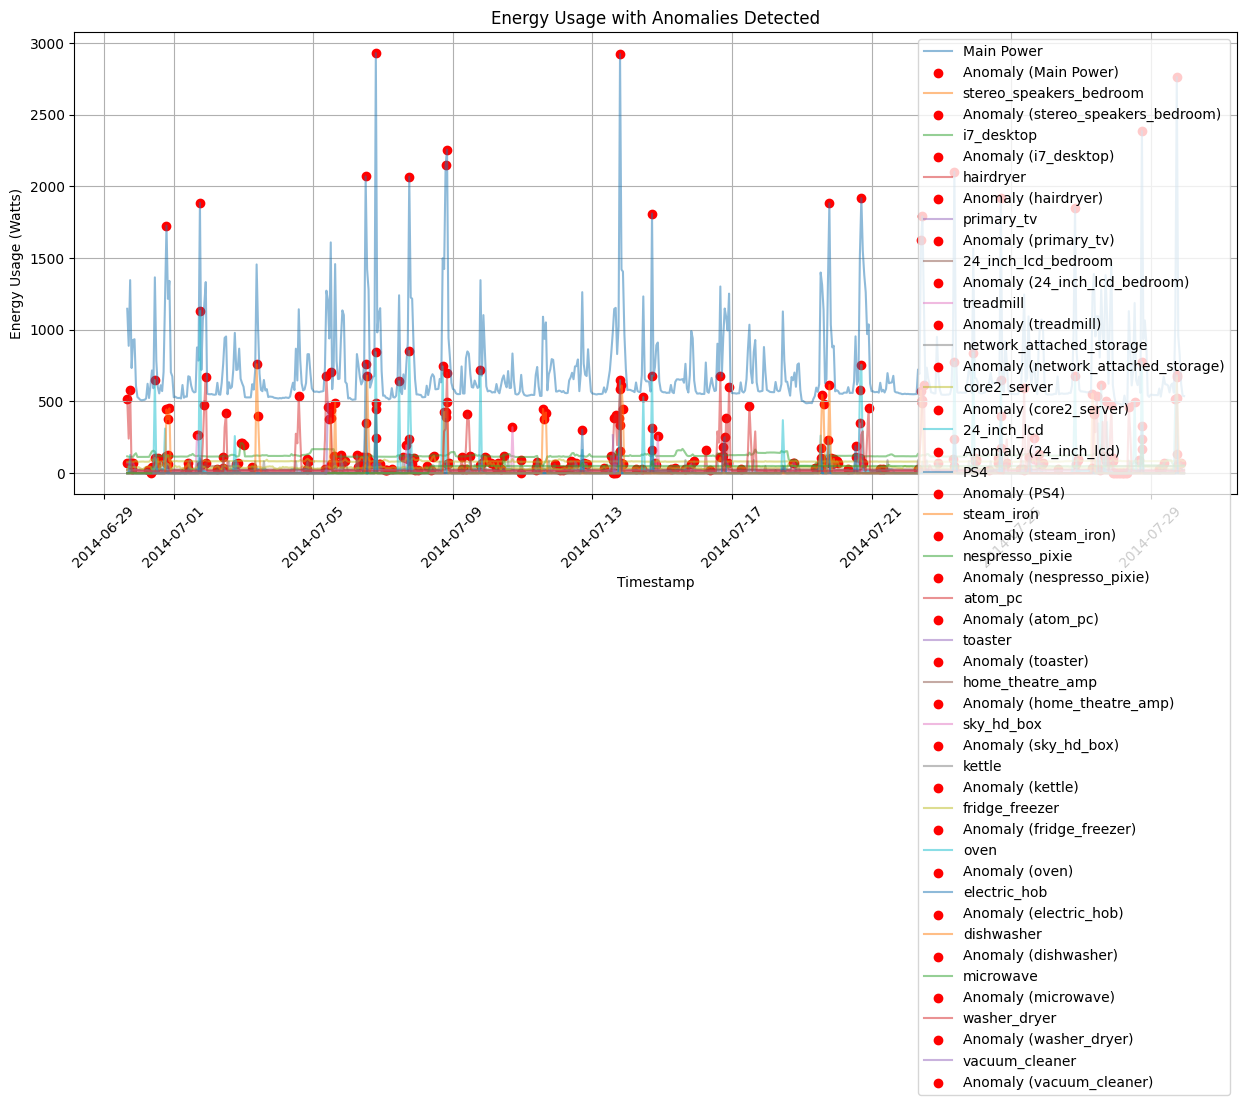


Anomalies in Main Power:
timestamp
2014-06-30 19:00:00    1726.178947
2014-07-01 18:00:00    1884.662609
2014-07-06 12:00:00    2069.711712
2014-07-06 19:00:00    2929.608929
2014-07-07 18:00:00    2068.527928
2014-07-08 19:00:00    2146.479927
2014-07-08 20:00:00    2256.894265
2014-07-13 19:00:00    2923.515152
2014-07-14 17:00:00    1810.616387
2014-07-19 19:00:00    1882.069565
2014-07-20 17:00:00    1917.887454
2014-07-22 11:00:00    1791.333333
2014-07-23 09:00:00    2103.090090
2014-07-24 17:00:00    1920.314019
2014-07-26 20:00:00    1852.080702
2014-07-28 18:00:00    2385.732965
2014-07-29 18:00:00    2762.343154
Name: Main Power, dtype: float64

Anomalies in stereo_speakers_bedroom:
timestamp
2014-07-10 23:00:00    1.063248
2014-07-13 14:00:00    1.169779
2014-07-13 15:00:00    1.499148
2014-07-13 16:00:00    1.079392
Name: stereo_speakers_bedroom, dtype: float64

Anomalies in i7_desktop:
timestamp
2014-07-02 22:00:00    207.680961
2014-07-02 23:00:00    209.242321
2014-07-0

In [13]:
import pandas as pd
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'house5_all_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly mean to reduce noise
df_resampled = df.resample('1H').mean()

# Plot Time Series Data
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage Patterns')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- Anomaly Detection ---
# Define threshold using standard deviation
threshold = 3 # Adjust this if needed
mean_usage = df_resampled.mean()
std_dev = df_resampled.std()

# Identify anomalies (values beyond mean ± threshold * std deviation)
anomalies = ((df_resampled - mean_usage).abs() > (threshold * std_dev))

# Plot Anomalies
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column, alpha=0.5)
    anomaly_points = df_resampled[column][anomalies[column]]
    plt.scatter(anomaly_points.index, anomaly_points, color='red', label=f'Anomaly ({column})')

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage with Anomalies Detected')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Print anomaly timestamps
for column in df_resampled.columns:
    print(f"\nAnomalies in {column}:")
    print(df_resampled[column][anomalies[column]].dropna())

/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/2583035428.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').mean()


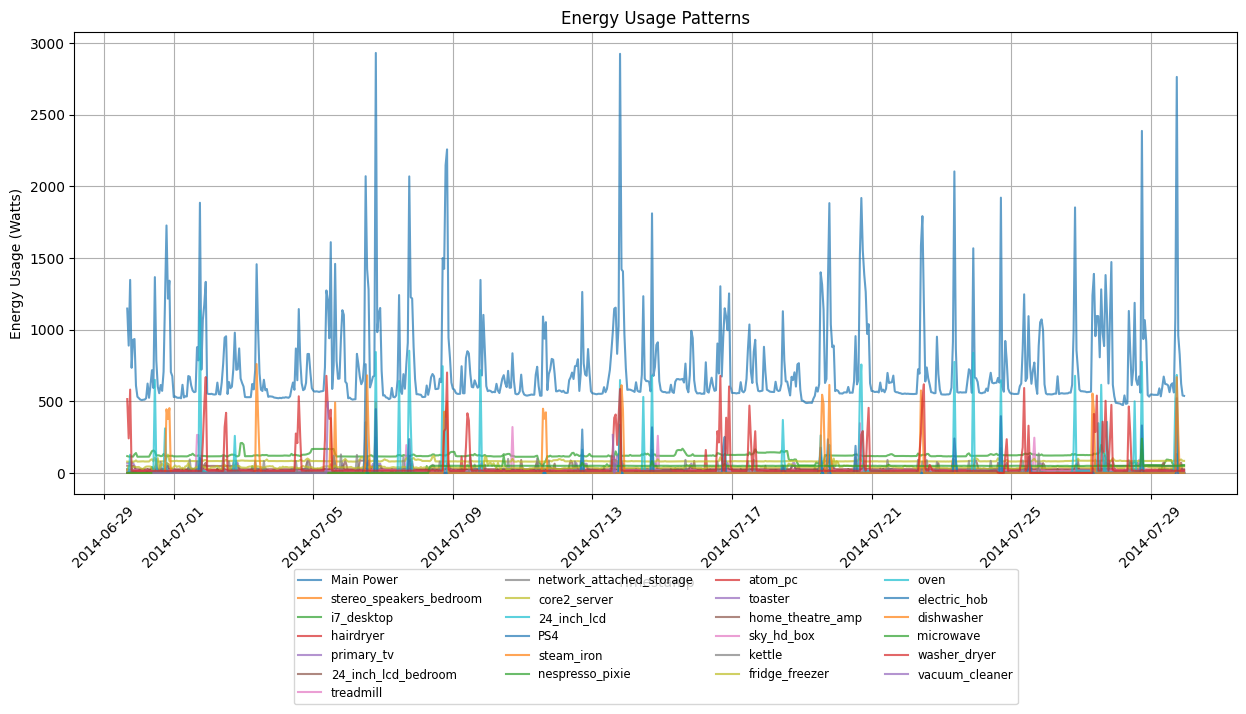

/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_3045/2583035428.py:41: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(anomaly_points.index, anomaly_points, color='red', edgecolors='black',


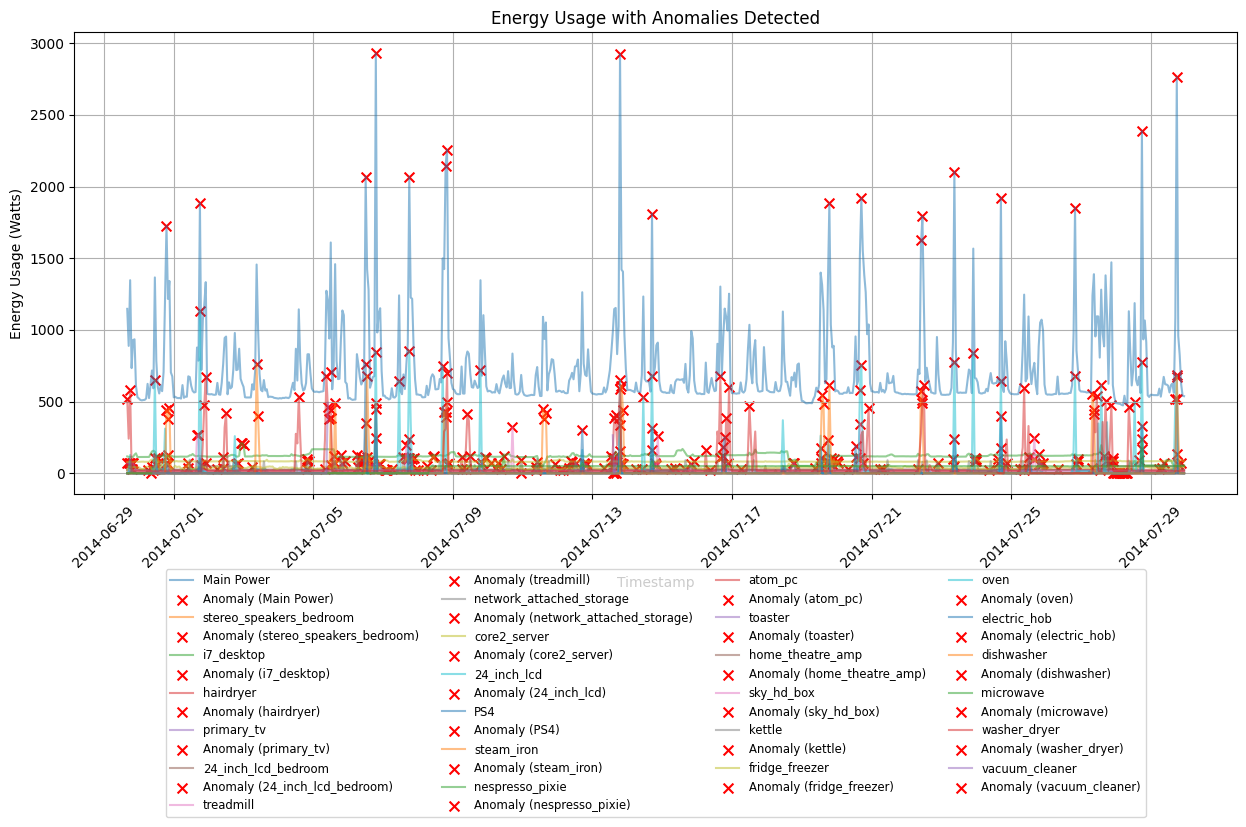


Anomalies in Main Power:
timestamp
2014-06-30 19:00:00    1726.178947
2014-07-01 18:00:00    1884.662609
2014-07-06 12:00:00    2069.711712
2014-07-06 19:00:00    2929.608929
2014-07-07 18:00:00    2068.527928
2014-07-08 19:00:00    2146.479927
2014-07-08 20:00:00    2256.894265
2014-07-13 19:00:00    2923.515152
2014-07-14 17:00:00    1810.616387
2014-07-19 19:00:00    1882.069565
2014-07-20 17:00:00    1917.887454
2014-07-22 11:00:00    1791.333333
2014-07-23 09:00:00    2103.090090
2014-07-24 17:00:00    1920.314019
2014-07-26 20:00:00    1852.080702
2014-07-28 18:00:00    2385.732965
2014-07-29 18:00:00    2762.343154
Name: Main Power, dtype: float64

Anomalies in stereo_speakers_bedroom:
timestamp
2014-07-10 23:00:00    1.063248
2014-07-13 14:00:00    1.169779
2014-07-13 15:00:00    1.499148
2014-07-13 16:00:00    1.079392
Name: stereo_speakers_bedroom, dtype: float64

Anomalies in i7_desktop:
timestamp
2014-07-02 22:00:00    207.680961
2014-07-02 23:00:00    209.242321
2014-07-0

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'house5_all_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly mean to reduce noise
df_resampled = df.resample('1H').mean()

# Plot Time Series Data
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column, alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage Patterns')
plt.xticks(rotation=45)
plt.grid()

# Move legend below the graph
plt.legend(ncol=4, fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

# --- Anomaly Detection ---
# Define threshold using standard deviation
threshold = 3  # Adjust this if needed
mean_usage = df_resampled.mean()
std_dev = df_resampled.std()

# Identify anomalies (values beyond mean ± threshold * std deviation)
anomalies = ((df_resampled - mean_usage).abs() > (threshold * std_dev))

# Plot Anomalies
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column, alpha=0.5)
    anomaly_points = df_resampled[column][anomalies[column]]
    plt.scatter(anomaly_points.index, anomaly_points, color='red', edgecolors='black', 
                label=f'Anomaly ({column})', marker='x', s=50)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage with Anomalies Detected')
plt.xticks(rotation=45)
plt.grid()

# Move legend below the graph
plt.legend(ncol=4, fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

# Print anomaly timestamps
for column in df_resampled.columns:
    print(f"\nAnomalies in {column}:")
    print(df_resampled[column][anomalies[column]].dropna())


Histograms of appliance power demand

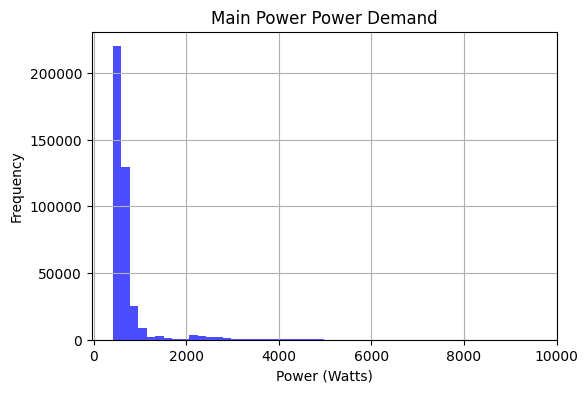

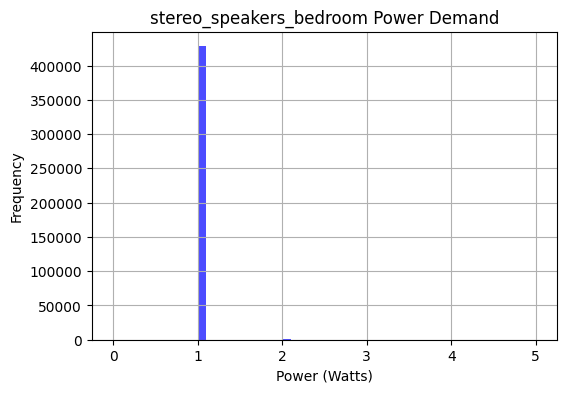

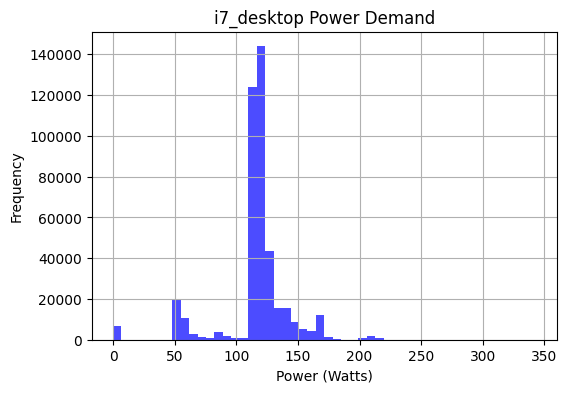

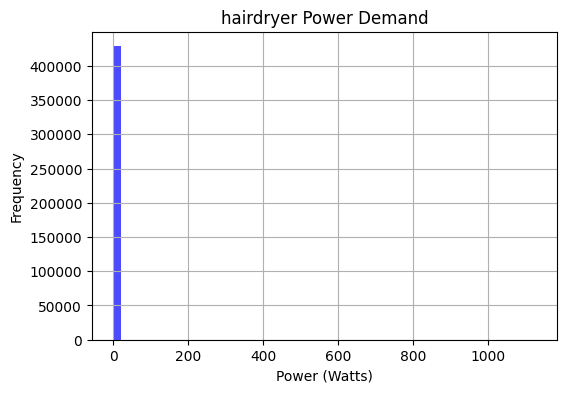

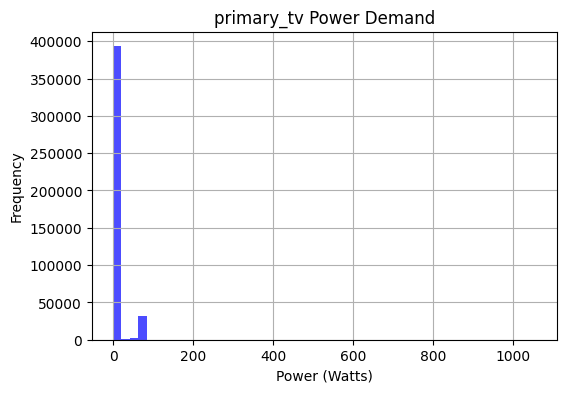

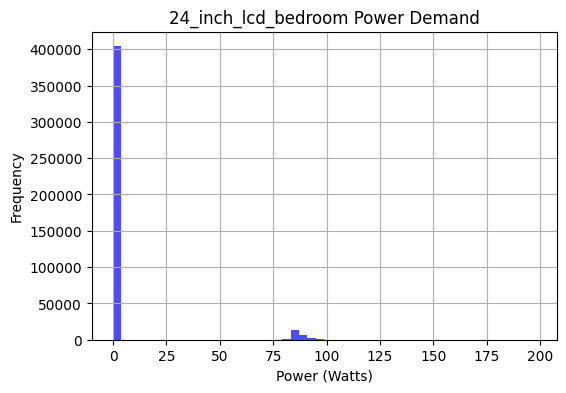

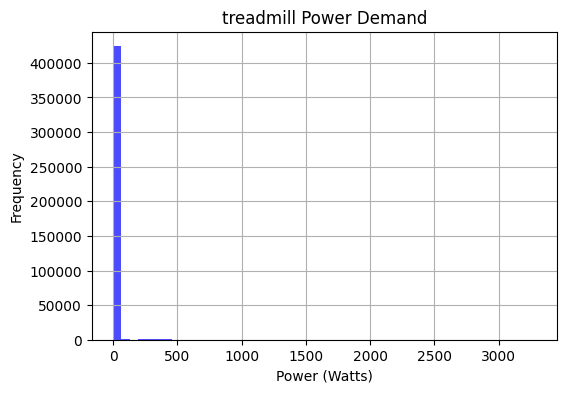

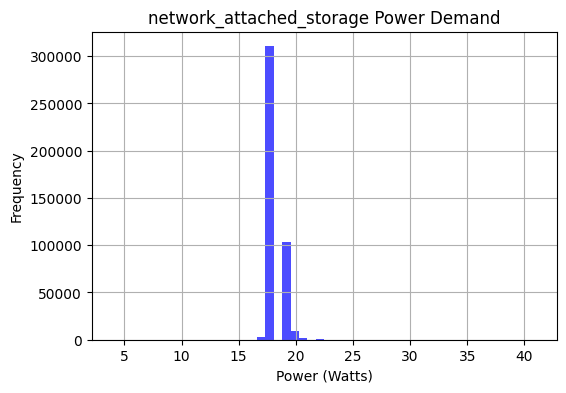

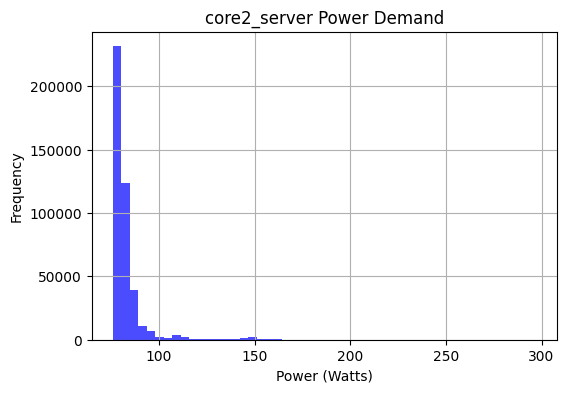

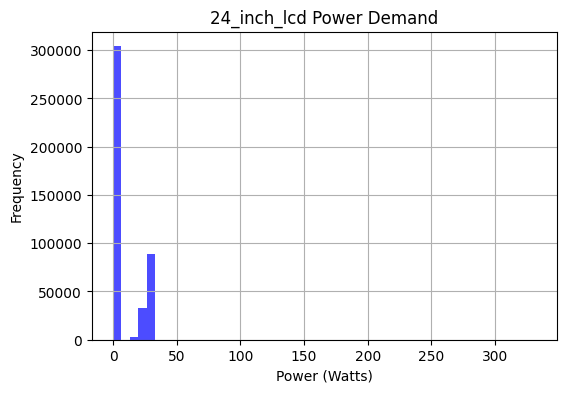

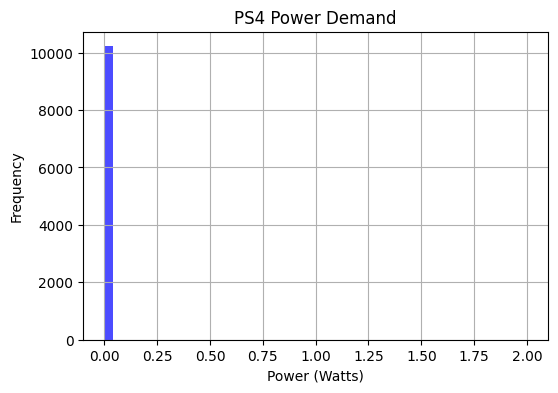

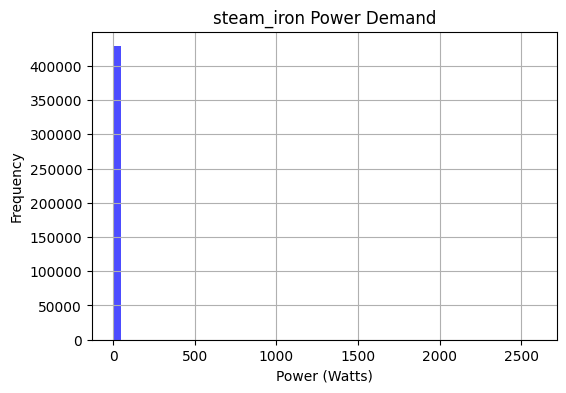

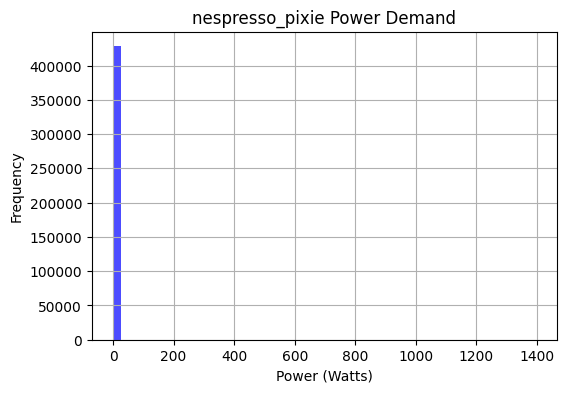

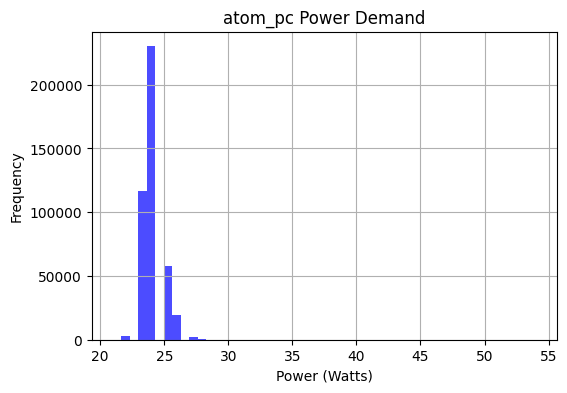

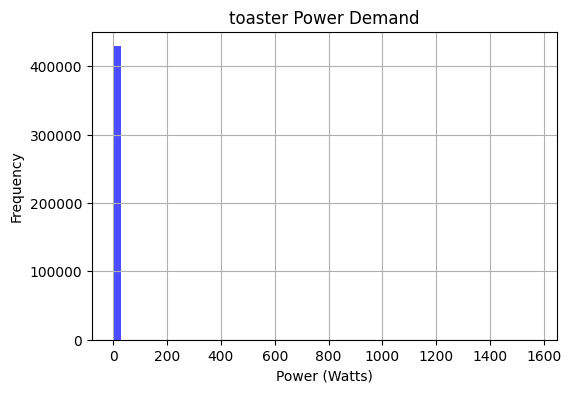

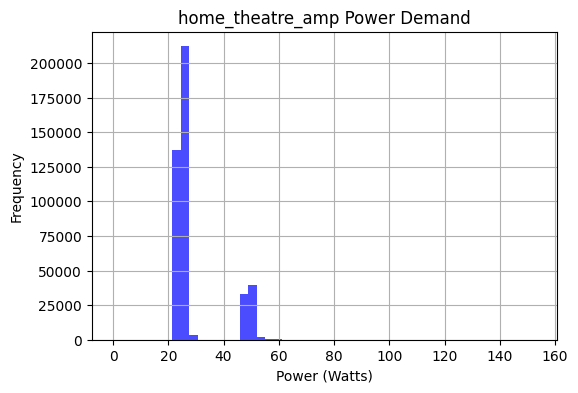

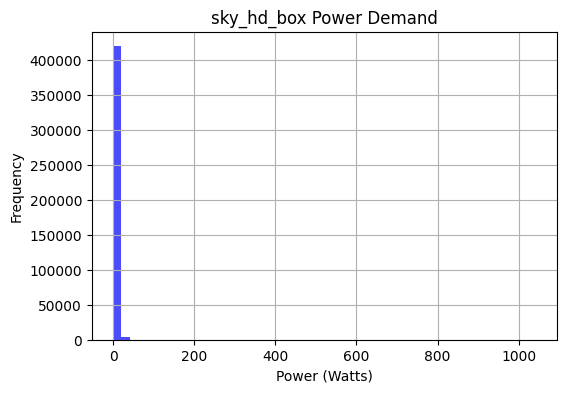

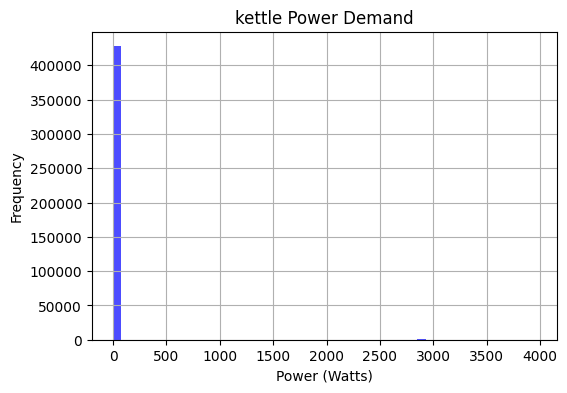

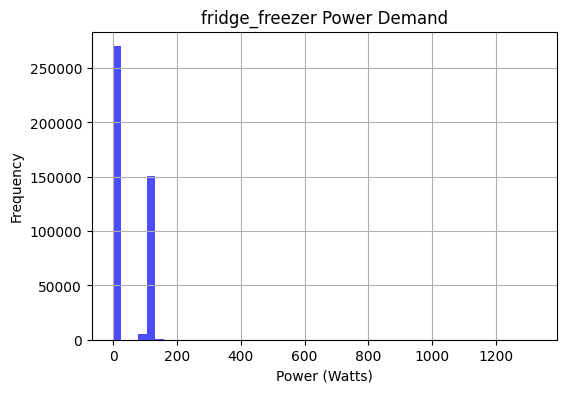

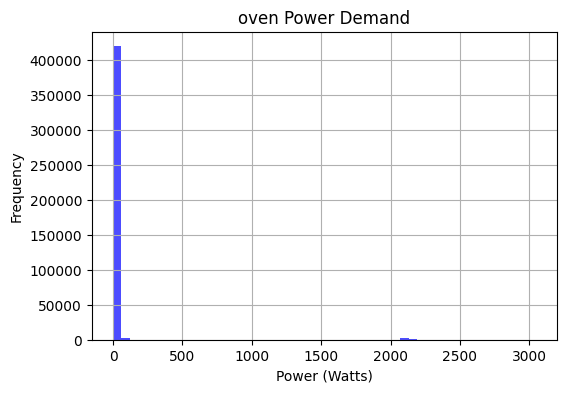

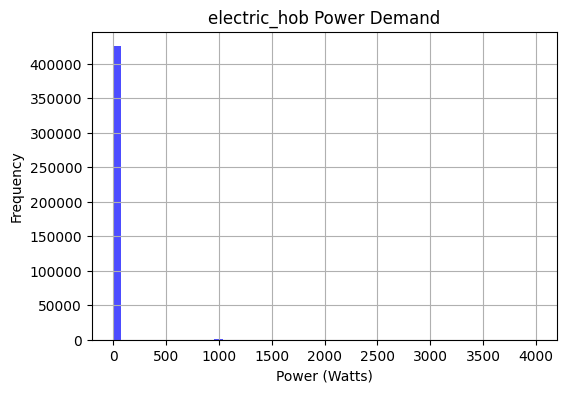

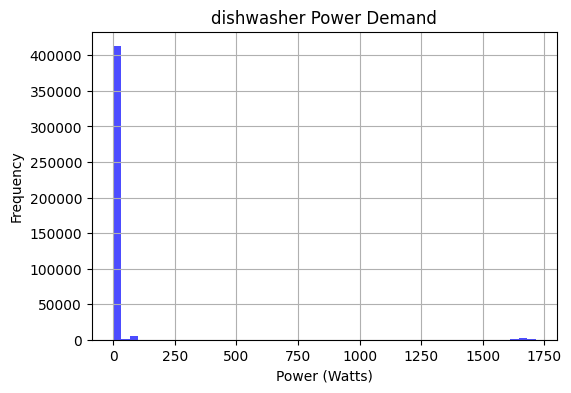

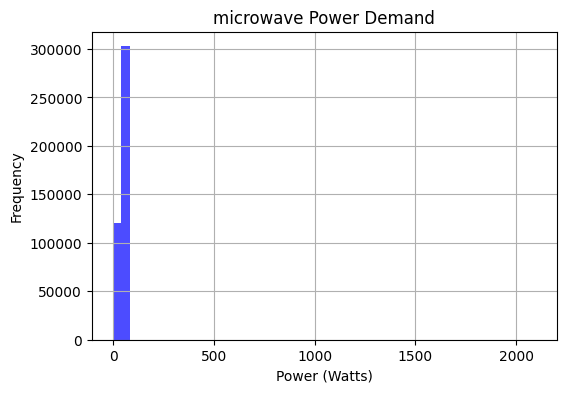

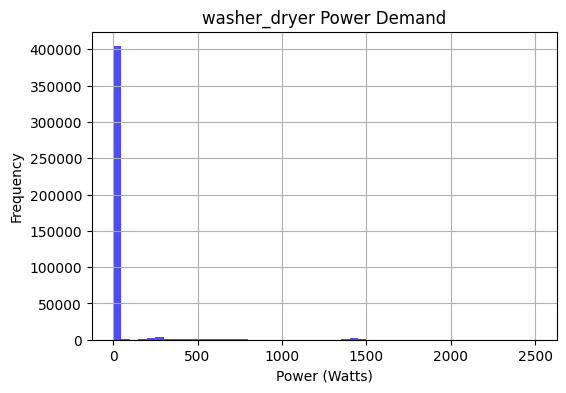

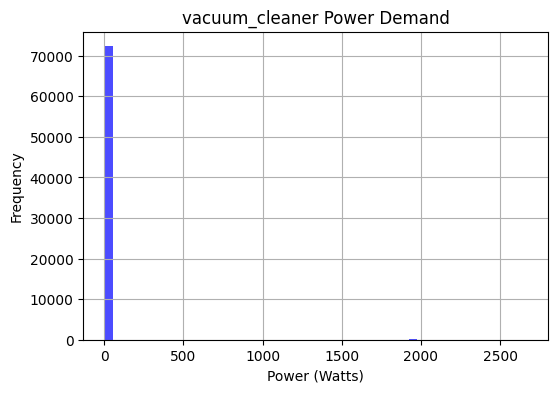

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (modify the file path as needed)
data = pd.read_csv("house5.csv", parse_dates=["timestamp"], index_col="timestamp")

# Define meter mapping
meter_mapping = {
    'meter1': 'Main Power',
    'meter2': 'stereo_speakers_bedroom',
    'meter3': 'i7_desktop',
    'meter4': 'hairdryer',
    'meter5': 'primary_tv',
    'meter6': '24_inch_lcd_bedroom',
    'meter7': 'treadmill',
    'meter8': 'network_attached_storage',
    'meter9': 'core2_server',
    'meter10': '24_inch_lcd',
    'meter11': 'PS4',
    'meter12': 'steam_iron',
    'meter13': 'nespresso_pixie',
    'meter14': 'atom_pc',
    'meter15': 'toaster',
    'meter16': 'home_theatre_amp',
    'meter17': 'sky_hd_box',
    'meter18': 'kettle',
    'meter19': 'fridge_freezer',
    'meter20': 'oven',
    'meter21': 'electric_hob',
    'meter22': 'dishwasher',
    'meter23': 'microwave',
    'meter24': 'washer_dryer',
    'meter25': 'vacuum_cleaner'
}

# Create histograms for each appliance
for meter, appliance in meter_mapping.items():
    plt.figure(figsize=(6, 4))
    plt.hist(data[appliance].dropna(), bins=50, color='blue', alpha=0.7)
    plt.xlabel("Power (Watts)")
    plt.ylabel("Frequency")
    plt.title(f"{appliance} Power Demand")
    plt.grid(True)
    plt.show()
